**1. В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:**

'df has y rows and x columns'

**где y — число строк, а x — число колонок.**

In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('3_taxi_peru.csv', 
                   parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')
rows, cols = df.shape
print(f'df has {rows} rows and {cols} columns')

df has 23111 rows and 19 columns


**2. Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит.**


In [28]:
df = pd.DataFrame({'client_id': np.random.randint(1, 10000, 30),
                   'sex': np.random.choice([0, 1], 30),
                   'wealth': np.random.choice(['low', None, 'high'], 30),
                   'age': np.random.randint(20, 70, 30)})
df.head()

,client_id,sex,wealth,age
0,665,0,None,50
1,6139,1,low,27
2,1990,0,high,53
3,2004,1,low,53
4,6435,1,high,56


In [29]:
na_number  = df.isna().sum()
na_number

client_id     0
sex           0
wealth       11
age           0
dtype: int64

**3. Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.**

In [30]:
df_types = df.dtypes
df_types

client_id     int32
sex           int64
wealth       object
age           int32
dtype: object

**4. Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.**

In [31]:
df['age'] = df.age.astype(str)
df.dtypes

client_id     int32
sex           int64
wealth       object
age          object
dtype: object

In [32]:
df['age'] = df.age.astype(int)
df['age']

0     50
1     27
2     53
3     53
4     56
5     55
6     23
7     64
8     60
9     61
10    51
11    23
12    45
13    68
14    36
15    61
16    22
17    66
18    57
19    65
20    36
21    29
22    34
23    25
24    64
25    43
26    25
27    45
28    63
29    49
Name: age, dtype: int64

**5. Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.**

In [33]:
df = df.drop(columns=['age', 'sex'])
df.head()

,client_id,wealth
0,665,None
1,6139,low
2,1990,high
3,2004,low
4,6435,high


**6. А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id**

In [34]:
len(df)

30

In [35]:
df = df.drop_duplicates(subset='client_id')

In [36]:
len(df)

30

**7. Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!**

**Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.**

**Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).**

In [37]:
import pandas as pd
path_to_file = '3_taxi_peru.csv'
taxi = pd.read_csv(path_to_file, sep=';')
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


**8.Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.**

**Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').**



In [56]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).dt.seconds / 60.0
taxi['wait_time']

0          18.0
1           NaN
2           NaN
3           NaN
4        1435.0
          ...  
23106       0.0
23107      13.0
23108       9.0
23109    1433.0
23110       NaN
Name: wait_time, Length: 23091, dtype: float64

**9. Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.**

**Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа узнайте id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз**

In [58]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)].head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,1435.0
5,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-10 13:00:00,"-12,02241898","-77,10650635",2010-08-10 14:26:00,"-12,08980179","-76,92608643",drop off,"-12,01706754","-77,05986526",2010-08-10 12:53:00,iPhone,NaN,4.0,1433.0
6,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,e1332f68e81526e498e4d845235baf80,executive,reserved,2010-08-08 12:10:00,"-12,08995819","-76,9262085",2010-08-08 12:48:00,"-12,02152252","-77,10623169",drop off,"-12,08509125","-76,96944424",2010-08-08 12:01:00,iPhone,5.0,5.0,1431.0
11,af7a0d5b65562d9e4f7749317efb1a3a,7abecd4f47c2c1d5390d86eb22181c90,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,7.0
17,761a1b1e8e4103f2ac5a42556413e2e7,2d163dcf6f3e01abf4af5b2a7222acc4,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-16 17:15:00,"-12,11476898","-76,97399902",2010-09-16 17:35:00,"-12,08744049","-76,92370605",drop off,"-12,11349964","-76,97416306",2010-09-16 17:10:00,iPhone,NaN,5.0,1435.0


In [59]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0)].driver_id.value_counts().idxmax()

'd665fb9f75ef5d9cd0fd89479380ba78'

**10. Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.**

In [60]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.day_name()
taxi[['start_at', 'month', 'weekday']].head()

,start_at,month,weekday
0,2010-11-16 16:44:00,11,Tuesday
1,2010-06-01 00:34:00,6,Tuesday
2,2010-05-31 05:01:00,5,Monday
3,2010-06-01 00:29:00,6,Tuesday
4,2010-09-11 23:55:00,9,Saturday


**11 Постройте график числа заказов по месяцам (month)**

**Вопрос: в каком летнем месяце было сделано наименьшее число заказов?**

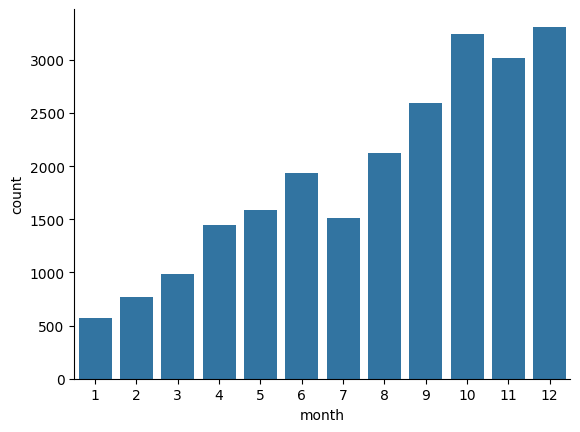

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=taxi, x='month')
sns.despine()
plt.show()

Ответ: 7 месяц (июль)

**12. А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:**

sns.countplot(data['column'], order=['One', 'Two', 'Three'])

**Вопрос: в какой день недели суммарно поступает меньше всего заказов?**

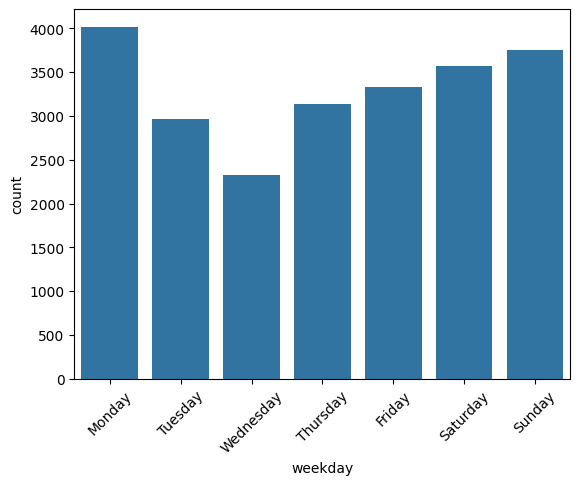

In [64]:
# первый вариант решения
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(data=taxi, x='weekday', order=order)
ax.tick_params(axis='x', rotation=45)

In [ ]:
# второй вариант решения
taxi.weekday = pd.Categorical(taxi.weekday, ordered=True, categories=order)
ax = sns.countplot(data=taxi, x='weekday')
ax.tick_params(axis='x', rotation=45)

pd.Categorical() формирует представление качественных переменных. В этом случае качественная переменная из 7 категорий (taxi.weekday) строится по количеству заказов (параметр categories) для каждой отдельной категории. В итоге taxi.weekday будет содержать класс с информацией о всех днях недели в отсортированном виде.

**13 Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:**

* DAU (daily active users) – число уникальных пользователей за день
* WAU (weekly active users) – число уникальных пользователей за неделю
* MAU (monthly active users) – число уникальных пользователей за месяц

**Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.**


* Летом наблюдался спад числа уникальных пользователей в месяц
* В течение всего года число уникальных пользователей увеличивалось*
* Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось
* MAU за апрель примерно в 2.5 раза больше, чем за январь*




Могут пригодиться:

* groupby – группировка
* nunique – число уникальных значений
* plot.line – линейная диаграмма

In [ ]:
mau = taxi.groupby('month').user_id.nunique()
mau

In [ ]:
# первый вариант
mau.plot.line()
sns.despine()

In [ ]:
# второй вариант
sns.lineplot(data=mau, marker='o')
sns.despine()

* Летом наблюдался спад числа уникальных пользователей в месяц
* **В течение всего года число уникальных пользователей увеличивалось**
* Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось
* **MAU за апрель примерно в 2.5 раза больше, чем за январь**